IMPORTANT: Make a copy of this noteboook into your Drive.

In [1]:
!pip install requests

# PANDAS first steps

PANDAS is the most popular library for data science (https://pandas.pydata.org/). A complete guide of this library can be found at https://pandas.pydata.org/docs/user_guide/index.html

Pandas relies on the **numpy** library for some operations, so it is convenient to import both libraries at ones.

Pandas has been integrated with matplotlib so that visualising data frames becomes an easy task with this library.

Notice that other many libraries for machine learning like **sckit-learn** as well for big data like **pySpark** have been adapted to interact/migrate into Panda's data frames. To sum up, Pandas is a standard de facto for data processing.


In [2]:
# Pandas and numpy are already installed in Colab and included in miniconda installations

import pandas as pd


import numpy as np

# SERIES

A series is the most basic elemento of Pandas and consists of an indexed list of elements.

**Note:** When using functions of imported packages, Colab will help you in knowing which arguments to use and a brief description.

In [3]:
# A series

s = pd.Series(data=[1.5,2,3,4,5,6])

s

0    1.5
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
dtype: float64

In [4]:
## how can we get the index and type of the series?


In [5]:
# Another series

s2 = pd.Series(data=[1.5,2,3,4,5,6,7])

s3 = s + s2
s3

0     3.0
1     4.0
2     6.0
3     8.0
4    10.0
5    12.0
6     NaN
dtype: float64

In [6]:
## Notice that like Numpy operators are overridden to be applied over series

Visualising series (and data frames) is direct with the method .plot, which is a wrapper on the matplotlib.

(https://pandas.pydata.org/docs/user_guide/visualization.html)

<Axes: >

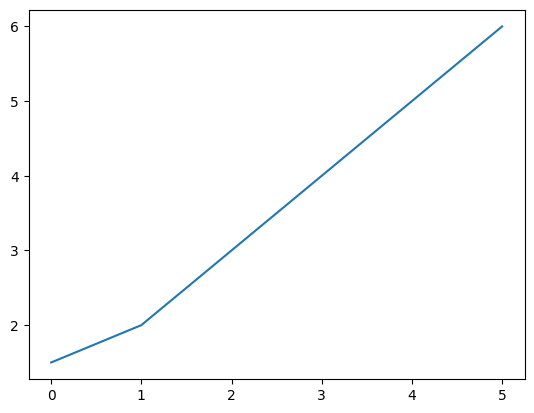

In [7]:
# Visualización con el método plot

s.plot.line()

<Axes: >

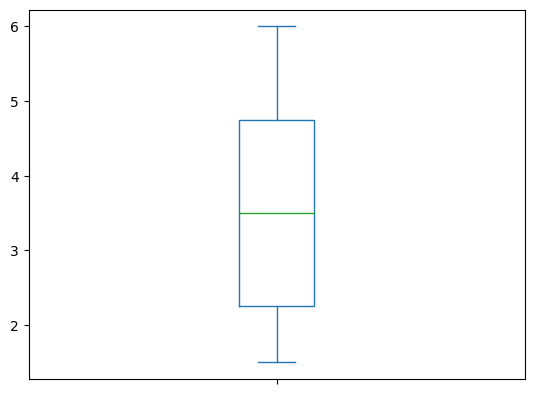

In [8]:
s.plot.box()

We can define the series indexes by explicitely passing the elements that will serve as index.

By default indexes are natural numbers (0 ... N), but we can change the index to be any arbitrary list of numbers or strings.

In [9]:
s = pd.Series(data=[6,5,4,3,2,1], index=['a','b','c','d','e','f'])
s

a    6
b    5
c    4
d    3
e    2
f    1
dtype: int64

<Axes: >

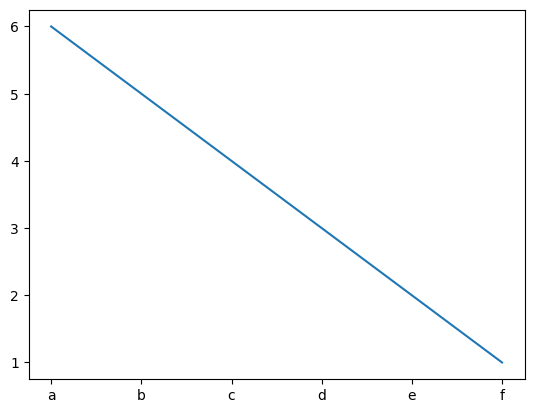

In [10]:
s.plot.line()

In [11]:
# Another way to create a series is by means a dictionary

s = pd.Series(data= {'b': 1, 'a': 0, 'c': 2})

s

b    1
a    0
c    2
dtype: int64

In [12]:
# We can easily to transform series to numpy arrays

v = s.to_numpy()

np.log(v)

<ipython-input-12-64249946d68e>:5: RuntimeWarning: divide by zero encountered in log
  np.log(v)


array([0.        ,       -inf, 0.69314718])

**Question:** Find two ways to transform series into Python lists.

#DATA FRAMES

DataFrames are collections of series sharing the same index (https://pandas.pydata.org/docs/user_guide/dsintro.html).

Series (columns) are organised into two axes:

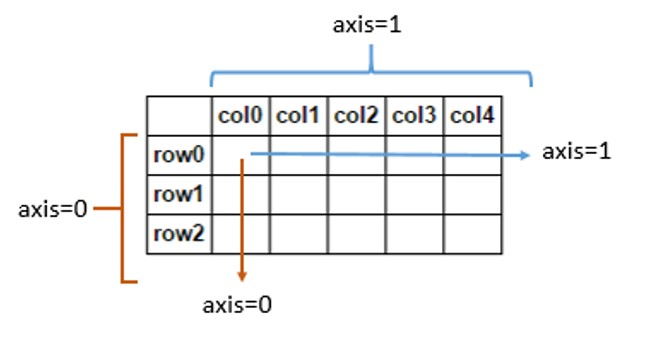





When importing with Pandas, data will be automatically converted into a dataframe. The usual way is as follows:

In [13]:
# El primer argumento es obligatorio y debe ser un fichero local o un fichero remoto (URL)

df = pd.read_csv('https://krono.act.uji.es/IDIA/airline-passengers.csv')

In [14]:
# Los data frames se pueden explorar de forma sencilla con los siguientes métodos
# Statistics
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [16]:
df.dtypes

Month         object
Passengers     int64
dtype: object

In [17]:
df.head(2) #first two rows

,Month,Passengers
0,1949-01,112
1,1949-02,118


In [18]:
# If we want that a column becomes the index, we should include index_col='Month' in read_csv

# or once loaded, with set_index('Month')

# we can also create the index with several columns (multi-index)

df = df.set_index('Month')
#df.set_index('Month', inplace=True)

In [19]:
df.tail(1) # last row

,Passengers
Month,
1960-12,432


<Axes: xlabel='Month'>

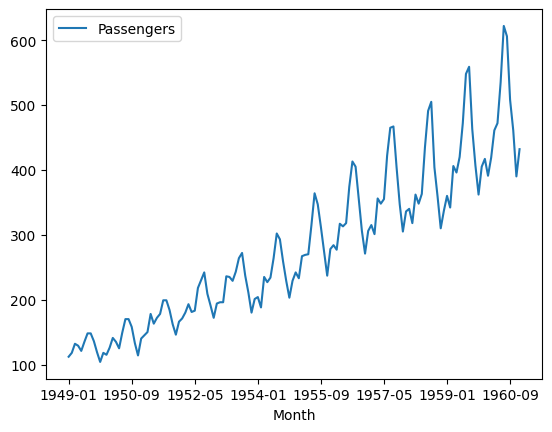

In [20]:
df.plot.line()

<Axes: >

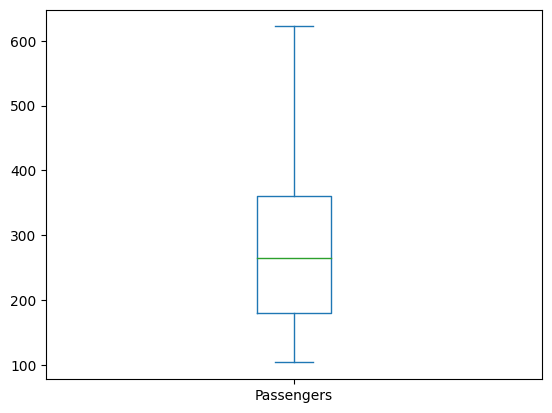

In [21]:
df.plot.box()

**Exercise 1**: Let's create a column with a true date ("Date") from the existing "Month" column. Let's complete the date by appending the day to string of Month and tgen we will change the column's datatype with [pd.to_datetime](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) Finally, we can get rid of the column "Month" with [df.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html). You can then change the index to the new column with:

`df.index = pd.to_datetime(....)`



<Axes: xlabel='Date'>

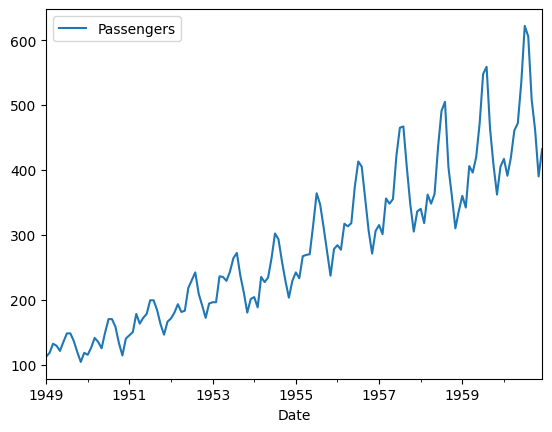

In [22]:
df = df.reset_index()

## Define a new column adding to Month añadiendo the string '-1' and convert the result to datetime

df['Date'] = df['Month']+'-1' #complete date from Month
df['Date']=pd.to_datetime(df['Date'])
#drop Month
df.drop(columns = 'Month', inplace=True)
#create the new index
df.set_index('Date',inplace=True)
df
#plot the new series
df.plot()

<Axes: xlabel='Date'>

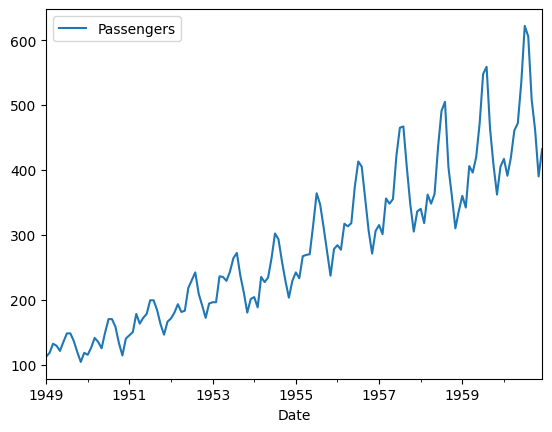

In [23]:
df.plot()

**Exercise 2**: By querying the documentation of Pandas of the `read_csv` function, find a way to directly import the data with the (incomplete) date of  `Month` as a datetime.

In [24]:
df = pd.read_csv('https://krono.act.uji.es/IDIA/airline-passengers.csv', converters={'Month': pd.to_datetime})

In [25]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

## Creation of Dataframe (without importing data)

In [26]:
# From series to dataframes

serie1 = pd.Series([1., 2., 3.], index=['a', 'b', 'c'])
serie2 = pd.Series([4., 3., 2., 1.], index=['a', 'b', 'c', 'd'])
df2 = pd.DataFrame({'serie1': serie1, 'serie2': serie2}) ## con el argumento index=[...] podemos cambiar los nombres de las columnas

df2

,serie1,serie2
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,NaN,1.0


<Axes: >

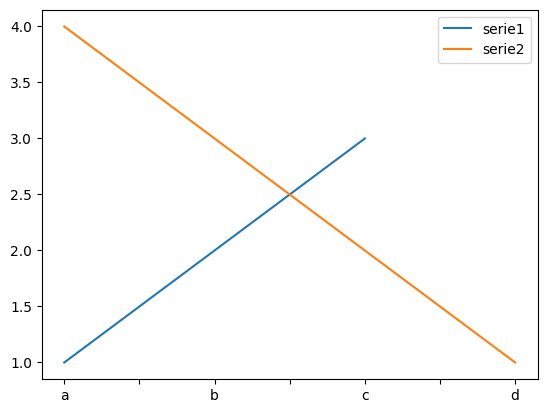

In [27]:
df2.plot.line(y=['serie1','serie2'])

In [28]:
# Columns and indexes are also series, which can be modified

print(df2.index, df2.columns)


Index(['a', 'b', 'c', 'd'], dtype='object') Index(['serie1', 'serie2'], dtype='object')


Exercise 3: Change the names of the series to 'S1' and 'S2', and complete properly the series 'series1'. Plot the result.

    S1   S2
a  1.0  4.0
b  2.0  3.0
c  3.0  2.0
d  4.0  1.0


<Axes: >

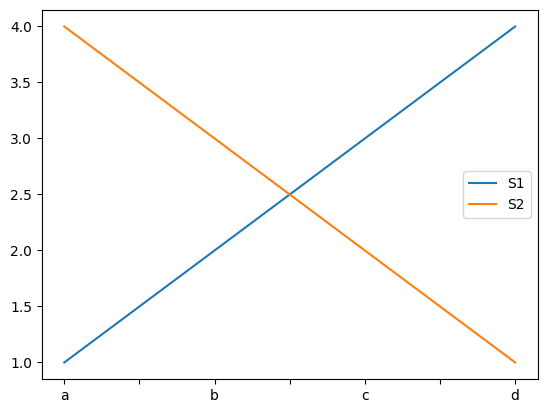

In [29]:
df2.rename(columns={'serie1': 'S1' , 'serie2' :'S2'},inplace=True)
 #another way to change the name of the columns but without using the index
df2.at['d','S1']=4.0
print(df2)
df2.plot()

In [30]:
#we put the original name another time
df2.rename(columns={'S1': 'serie1' , 'S2' :'serie2'},inplace=True)

We can easlify find correlations between the numerical columns as follows:

In [31]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

df2.corr()

,serie1,serie2
serie1,1.0,-1.0
serie2,-1.0,1.0


Las columnas del dataframe se pueden seleccionar de una forma similar a como vimos con los diccionarios.

In [32]:
## Seleccionamos la serie de la columna 'uno'

df2['serie1']

a    1.0
b    2.0
c    3.0
d    4.0
Name: serie1, dtype: float64

In [33]:
## Tambien podemos añadir y borrar columnas de forma similar a las claves de diccionario

df2['serie3'] = 20

print(df2)

del df2['serie3'] ##lo borra para siempre

print(df2)

   serie1  serie2  serie3
a     1.0     4.0      20
b     2.0     3.0      20
c     3.0     2.0      20
d     4.0     1.0      20
   serie1  serie2
a     1.0     4.0
b     2.0     3.0
c     3.0     2.0
d     4.0     1.0


In [34]:
df2['serie3'] = 20

df2.drop(columns='serie3', inplace=True) ## hace una copia, excepto si se usa inplace=True

In [35]:
df2

,serie1,serie2
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [36]:
## Creating new columns from existing ones is very intuitive

df2['serie3'] = df2['serie1'] * 10 + df2['serie2']

df2

,serie1,serie2,serie3
a,1.0,4.0,14.0
b,2.0,3.0,23.0
c,3.0,2.0,32.0
d,4.0,1.0,41.0


Applying comparisons to series generates new series of boolean values.

In [37]:
df2['serie1'] > df2['serie2']

a    False
b    False
c     True
d     True
dtype: bool

Lambda functions can be applied as well to generate new columns.

In [38]:
df2.assign(serie4 = lambda x: (x.serie1 > x.serie2).astype(float)) ##OJO: devuelve una copia

,serie1,serie2,serie3,serie4
a,1.0,4.0,14.0,0.0
b,2.0,3.0,23.0,0.0
c,3.0,2.0,32.0,1.0
d,4.0,1.0,41.0,1.0


In [39]:
df2

,serie1,serie2,serie3
a,1.0,4.0,14.0
b,2.0,3.0,23.0
c,3.0,2.0,32.0
d,4.0,1.0,41.0


Treating null values can be applied to all the dataframe.

In [40]:
# Remove rows with null values

df2.dropna() #Note: this is a copy, use inplace=True to modify the existing dataframe

,serie1,serie2,serie3
a,1.0,4.0,14.0
b,2.0,3.0,23.0
c,3.0,2.0,32.0
d,4.0,1.0,41.0


**Question:** How can remove the columns having some null value?

In [41]:
## Fill null values with some fix value

df2.fillna(value=0) #Note: this is not a copy

,serie1,serie2,serie3
a,1.0,4.0,14.0
b,2.0,3.0,23.0
c,3.0,2.0,32.0
d,4.0,1.0,41.0


The above operations return new dataframes, and therefore do not alter the content of the original dataframe. To change the content of the dataframe we can either assign the result to the same dataframe, or use the inplace argument (more efficient).


In [42]:
#df2 = df2.dropna()

df2.dropna(inplace=True)

In [43]:
df2

,serie1,serie2,serie3
a,1.0,4.0,14.0
b,2.0,3.0,23.0
c,3.0,2.0,32.0
d,4.0,1.0,41.0


**APPLY**: This function allows you to perform any type of transformation on any of the axes using anonymous or user-defined functions. Same as assign, returns the transformed dataframe.

In [44]:
# The lambda function iterates over the rows (axis=1)

df2.apply(lambda x: x.serie1 * x.serie2, axis=1)

a    4.0
b    6.0
c    6.0
d    4.0
dtype: float64

In [45]:
df2.apply(np.sqrt) ## applied to all the dataframe

,serie1,serie2,serie3
a,1.000000,2.000000,3.741657
b,1.414214,1.732051,4.795832
c,1.732051,1.414214,5.656854
d,2.000000,1.000000,6.403124


In [46]:
# we can generate new columns with the apply function

df2['producto'] = df2.apply(lambda x: x['serie1'] * x['serie2'], axis=1)

df2.head()

,serie1,serie2,serie3,producto
a,1.0,4.0,14.0,4.0
b,2.0,3.0,23.0,6.0
c,3.0,2.0,32.0,6.0
d,4.0,1.0,41.0,4.0


In [47]:
## or we can use apply to just one specific column

df2['dos_mayor_3'] = df2['serie2'].apply(lambda x: 1 if x > 3 else 0)

df2.head()

,serie1,serie2,serie3,producto,dos_mayor_3
a,1.0,4.0,14.0,4.0,1
b,2.0,3.0,23.0,6.0,0
c,3.0,2.0,32.0,6.0,0
d,4.0,1.0,41.0,4.0,0


**Question:** Can we use apply over a subset of columns? How can we do this?

In [48]:
# For columns (axis 0), we iterate over the columns (series)

sumas = df2.apply(lambda x: np.sum(x) )
sumas

serie1          10.0
serie2          10.0
serie3         110.0
producto        20.0
dos_mayor_3      1.0
dtype: float64

## EXERCISES

**Exercise 4.** Numpy allows you to create arrays of random numbers with the random object (see the attached links). Create a dataframe with three series and column names that you want. Then create an extra column with the sum of the previous columns (called "sum"), and another column called "sign_sum" where it indicates whether the sign of the sum is positive (1) or negative (-1).

https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html




In [57]:
col1=pd.Series(np.random.randint(0,5,size=5),index=['a','b','c','d','e'])
col2=pd.Series(np.random.randint(0,10,size=5),index=['a','b','c','d','e'])
col3=pd.Series(np.random.randint(-20,10,size=5),index=['a','b','c','d','e'])
df4=pd.DataFrame({'col1': col1, 'col2' : col2, 'col3': col3})
df4['sum'] = df4.apply(lambda x: sum(x), axis=1)
df4['sign_sum'] =df4.apply(lambda x: np.sign(x['sum']),axis=1)
df4

,col1,col2,col3,sum,sign_sum
a,2,9,-8,3,1
b,2,8,-15,-5,-1
c,2,0,9,11,1
d,3,3,6,12,1
e,2,3,-5,0,0


**Exercise 5.** Using the *apply* function and the previous dataframe, normalize the series so that they always add up to one.

In [59]:

df4=pd.DataFrame({'col1': col1, 'col2' : col2, 'col3': col3})
df4 = df4.apply(lambda x: (x-min(x))/(max(x)-min(x))).apply(lambda x: x/sum(x))
df4


,col1,col2,col3
a,0.0,0.391304,0.112903
b,0.0,0.347826,0.000000
c,0.0,0.000000,0.387097
d,1.0,0.130435,0.338710
e,0.0,0.130435,0.161290


**Exercise 6.** With the `shift` function you can shift a series according to the specified period. From the passenger dataframe (df), add a shifted series and calculate the **autocorrelation** between the original and the shifted series.

In [51]:
# add the shited series as a new column
df['shifted_passengers']=df['Passengers'].shift(periods = 3)
df
# calculate the correlation
df.corr(method='pearson')

<ipython-input-51-735ebd3b39ab>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


,Passengers,shifted_passengers
Passengers,1.000000,0.837395
shifted_passengers,0.837395,1.000000


**Note**: You can use the random functions of numpy to generate the necessary data for the exercises.

In [52]:
# randint between 100 and 300
100 + np.random.randint(200, size=(5,))

array([175, 224, 115, 185, 138])

In [53]:
#rand between 100 and 300
100 + np.random.rand(5) * 200

array([167.20493702, 160.45375332, 244.24957615, 134.42536582,
       133.06429964])

# COLABORATIVE EXERCISE

This exercise is optional and it is not necessary to include it in the weekly deliverable. We will work all together to find out the solution.

**Problem:** Given the results of the questionaire about the students' Data Science skills (see link below), you have to import and transform the results reported of the Google Sheet to obtain similar visualizations to those provided by Google Forms. Additionally, you have to calculate the correlations between the different skills.

https://docs.google.com/spreadsheets/d/1-Cw9X9zLtEVuCn611cDltmFUSAdI6BR7AkMXYDMOg6o/edit?usp=drive_link

In [54]:
'''
  TASKS:
  1. Connect and import data from a shared Google Sheet
  2. Create a new dataframe with the summary data from the imported data
  4. Calculate statistics and visualize the summarised data
'''


'\n  TASKS:\n  1. Connect and import data from a shared Google Sheet\n  2. Create a new dataframe with the summary data from the imported data\n  4. Calculate statistics and visualize the summarised data\n'

In [55]:
# https://docs.google.com/spreadsheets/d/1-Cw9X9zLtEVuCn611cDltmFUSAdI6BR7AkMXYDMOg6o/edit?usp=sharing

